# Exercise 4: Linear Regression

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

In [56]:
data = pd.read_csv('../Data/train.csv')

## Problem 1 : Predicting SalePrice using GrLivArea

In [57]:
houseGrLivArea = pd.DataFrame(data['GrLivArea'])
houseSalePrice = pd.DataFrame(data['SalePrice'])

#### a) Plot houseSalePrice against houseGrLivArea using standard jointplot

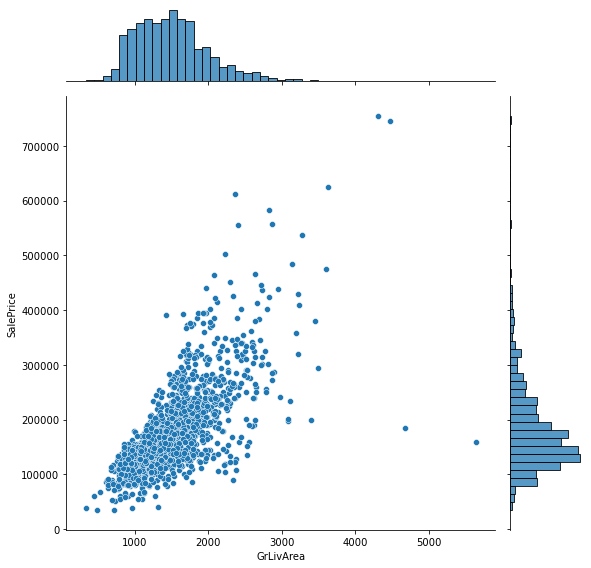

In [58]:
sb.jointplot(x = data['GrLivArea'] , y =data['SalePrice'] , height = 8)

#### b) Import Linear Regression 

In [59]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#### c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets

In [60]:
from sklearn.model_selection import train_test_split

houseGrLivArea_train , houseGrLivArea_test , houseSalePrice_train, houseSalePrice_test = train_test_split(houseGrLivArea, houseSalePrice ,test_size = 360/1460 )
#Check the partition size
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


#### d) Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train


In [61]:
linreg.fit(houseGrLivArea_train , houseSalePrice_train)

LinearRegression()

#### e) Print the coefficients of the Linear Regression model and plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line. 

In [62]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [14724.70376238]
Coefficients 	: a =  [[109.73654189]]


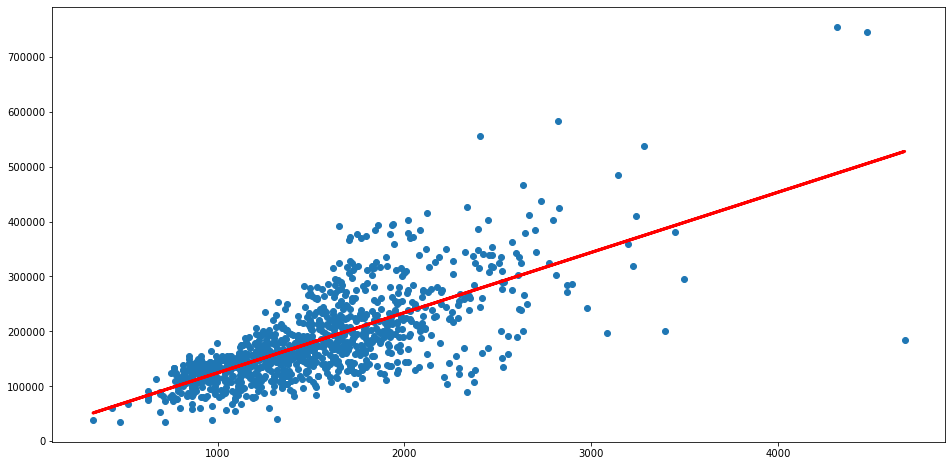

In [63]:
def linregscatt(X_train , y_train, intercept , coef):
    regline_x = X_train
    # y = a*x + b
    regline_y = intercept + coef*X_train

    f , axes = plt.subplots(1,1,figsize = (16,8))
    #scatter plot of the training data
    plt.scatter(X_train ,y_train)
    #the best fit line for the plot 
    plt.plot(regline_x , regline_y , 'r-',linewidth =3) 
linregscatt(houseGrLivArea_train , houseSalePrice_train ,linreg.intercept_ , linreg.coef_ )

#### f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.


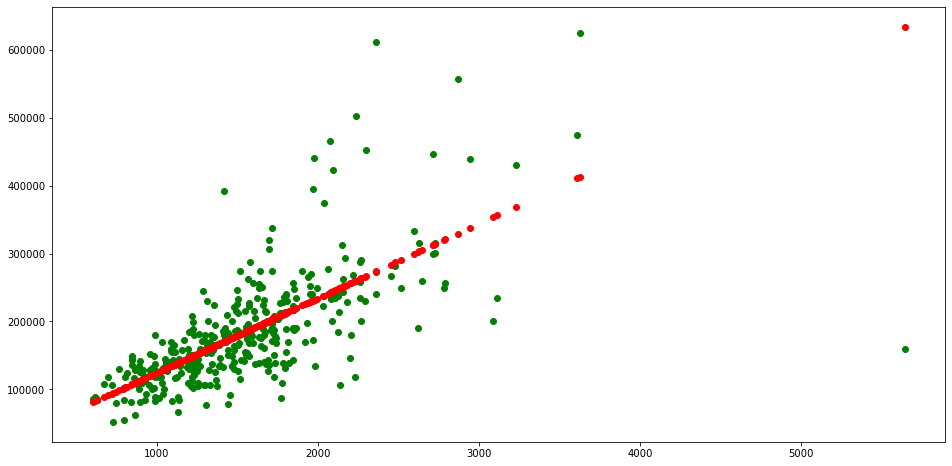

In [64]:
#predicting the value of sale price by using GrLivArea
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test) 
f,axes = plt.subplots(1,1,figsize =(16,8))
plt.scatter(houseGrLivArea_test,houseSalePrice_test,color = 'green')
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred , color= 'red')

#### g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
#score on the Train set 
print("Explained Variance (R^2) \t:" , linreg.score(houseGrLivArea_train , houseSalePrice_train))

Explained Variance (R^2) 	: 0.5219888802592919


In [67]:
#score on the Test set
print("Explained Variance (R^2) \t:" , linreg.score(houseGrLivArea_test, houseSalePrice_test))

Explained Variance (R^2) 	: 0.44636347369421037


## Problem 2: Predicting SalePrice using Other Variables

#### Perform all the above steps on 'SalePrice' against each of the variables 'LotArea', 'TotalBsmtSF', 'GarageArea' one-by-one to perform individual Linear Regressions. Discuss with your Friends about the models, compare and contrast the Explained Variance (R^2), check the predictions, and determine which model is the best to predict 'SalePrice'.

In [68]:
houseLotArea = pd.DataFrame(data['LotArea'])
houseTotalBsmtSF = pd.DataFrame(data['TotalBsmtSF'])
houseGarageArea = pd.DataFrame(data['GarageArea'])

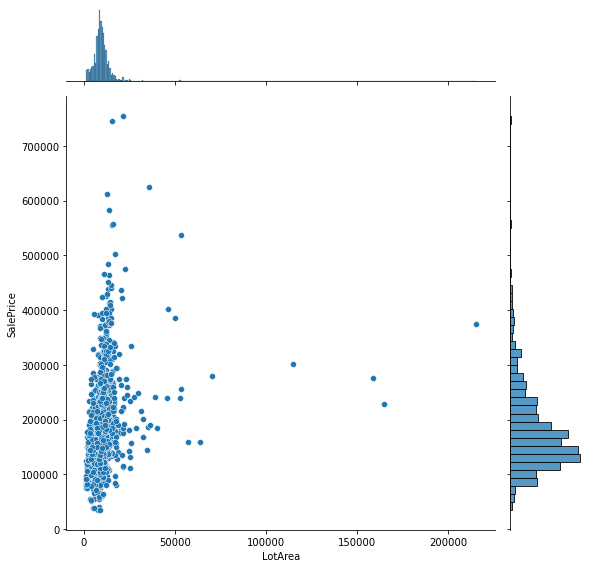

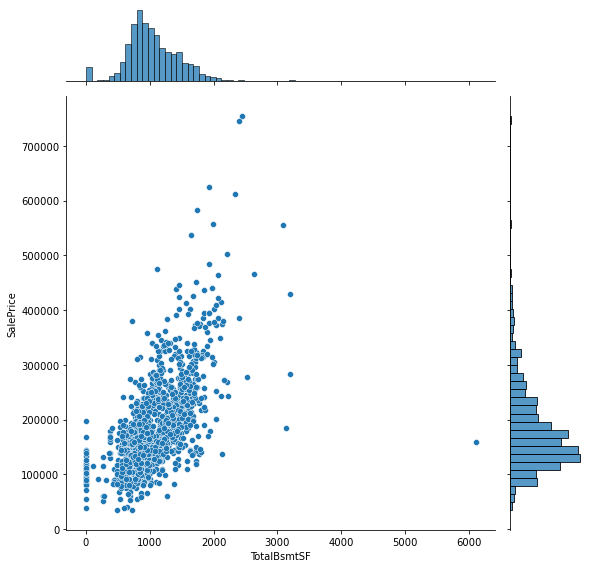

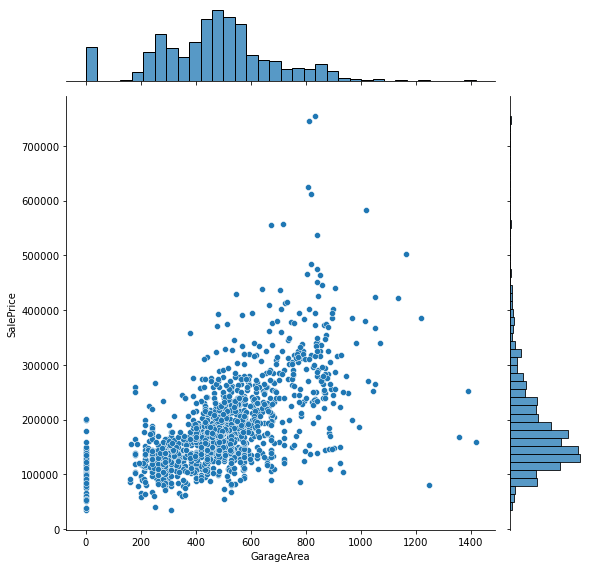

In [69]:
features = ['LotArea' , 'TotalBsmtSF' , 'GarageArea']
for feature in features: 
    sb.jointplot(x = data[feature] , y = data['SalePrice'] , height = 8)

In [70]:
#partition for LotArea
houseLotArea_train, houseLotArea_test , houseSalePrice_train, houseSalePrice_test = train_test_split(houseLotArea , houseSalePrice ,test_size = 360/1460 )
#partition for TotalBsmtSF
houseTotalBsmtSF_train,houseTotalBsmtSF_test,houseSalePrice_train,houseSalePrice_test = train_test_split(houseTotalBsmtSF , houseSalePrice, test_size =360/1460)
#partition for GarageArea
houseGarageArea_train,houseGarageArea_test,houseSalePrice_train,houseSalePrice_test =train_test_split(houseGarageArea,houseSalePrice, test_size =360/1460)

LotArea
Intercept 	: b =  [178969.33251648]
Coefficients 	: a =  [[0.0908124]]

TotalBsmtSF
Intercept 	: b =  [184898.67142848]
Coefficients 	: a =  [[-4.6477811]]

GarageArea
Intercept 	: b =  [75789.61983196]
Coefficients 	: a =  [[218.80925274]]



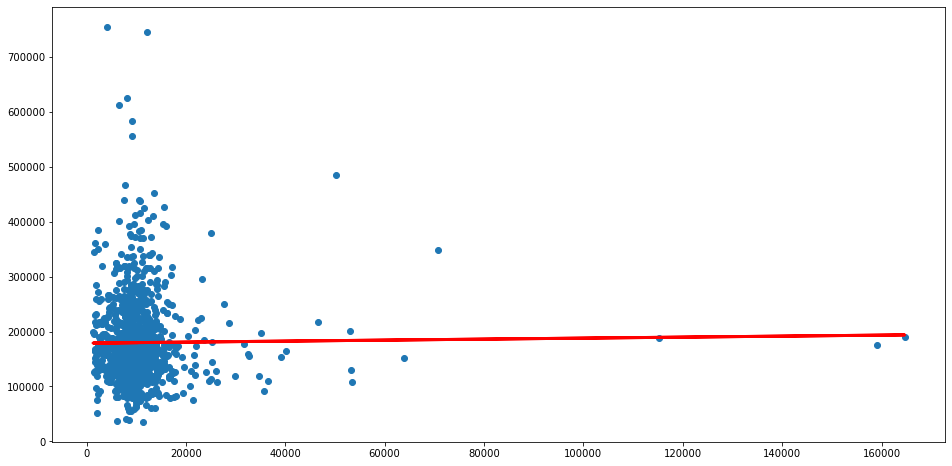

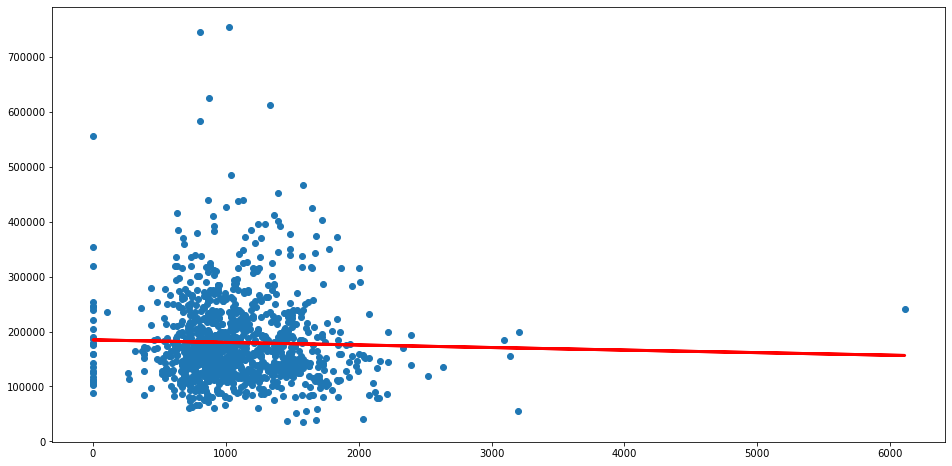

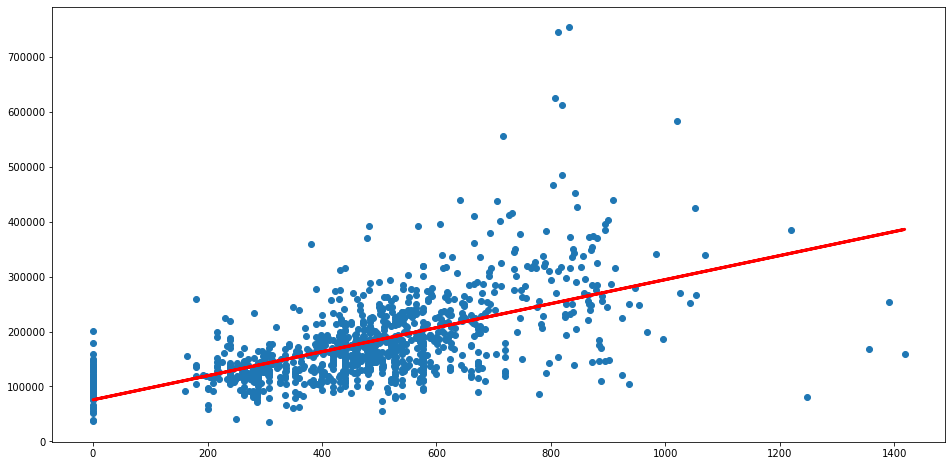

In [71]:
featureTrain = [houseLotArea_train , houseTotalBsmtSF_train,houseGarageArea_train]
index = 0 
for feature in featureTrain: 
    linreg.fit(feature, houseSalePrice_train) 
    print(features[index])
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_) 
    print('')
    linregscatt(feature , houseSalePrice_train,linreg.intercept_,linreg.coef_)
    index+=1

In [ ]:
#other steps are exactly the same as the first one 